In [56]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader

In [57]:
data_dir = './'
train_dir = data_dir + '/train_filelist'
valid_dir = data_dir + '/val_filelist'

- 1.一般打上标签的格式为 标签 路径
- 2.自定义 __init__ __getitem__ 方法

In [58]:

class SourceDataset(Dataset):
    def __init__(self, root_dir, ann_file, transform=None):
        self.ann_file = ann_file
        self.root_dir = root_dir
        self.img_label = self.load_annotations()
        self.img = [os.path.join(self.root_dir,img) for img in list(self.img_label.keys())]
        self.label = [label for label in list(self.img_label.values())]
        self.transform = transform
 
    def __len__(self):
        return len(self.img)
 
    def __getitem__(self, idx):
        image = Image.open(self.img[idx])
        label = self.label[idx]
        if self.transform:
            image = self.transform(image)
        label = torch.from_numpy(np.array(label))
        return image, label
    
    def load_annotations(self):
        data_infos = {}
        with open(self.ann_file) as f:
            samples = [x.strip().split(' ') for x in f.readlines()]
            for filename, gt_label in samples:
                data_infos[filename] = np.array(gt_label, dtype=np.int64)
        return data_infos

比较通用的预处理方法

In [59]:
data_transforms = {
    'train': 
        transforms.Compose([
        transforms.Resize(64),
        transforms.RandomRotation(45),#随机旋转，-45到45度之间随机选
        transforms.CenterCrop(64),#从中心开始裁剪
        transforms.RandomHorizontalFlip(p=0.5),#随机水平翻转 选择一个概率概率
        transforms.RandomVerticalFlip(p=0.5),#随机垂直翻转
        transforms.ColorJitter(brightness=0.2, contrast=0.1, saturation=0.1, hue=0.1),#参数1为亮度，参数2为对比度，参数3为饱和度，参数4为色相
        transforms.RandomGrayscale(p=0.025),#概率转换成灰度率，3通道就是R=G=B
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])#均值，标准差
    ]),
    'valid': 
        transforms.Compose([
        transforms.Resize(64),
        transforms.CenterCrop(64),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [60]:
train_dataset = SourceDataset(root_dir=train_dir, ann_file = './train.txt', transform=data_transforms['train'])
val_dataset = SourceDataset(root_dir=valid_dir, ann_file = './val.txt', transform=data_transforms['valid'])

In [61]:
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=True)

In [62]:
display(f"训练集长度：{len(train_loader)}")
display(f"验证集长度：{len(val_loader)}")

'训练集长度：1'

'验证集长度：1'

测试前验证

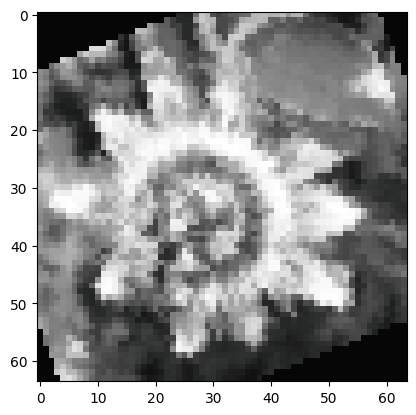

Label is: 0


In [63]:
train_loader_iter = iter(train_loader)
image, label = next(train_loader_iter)
sample = image[0].squeeze()
sample = sample.permute((1, 2, 0)).numpy()
sample *= [0.229, 0.224, 0.225]
sample += [0.485, 0.456, 0.406]
plt.imshow(sample)
plt.show()
print('Label is: {}'.format(label[0].numpy()))